MY DATA SCIENCE PROJECT AT COGNIFYZ INTERNSHIP LEVEL 2 (FIRST TASK)

In the level two of my internship, my first task would be :

- To Determine the percentage of restaurants that offer table booking and online delivery.
- To Compare the average ratings of restaurants with table booking and those without.
- Analyze the availability of online delivery among restaurants with different price ranges.


In [48]:
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
%matplotlib inline

In [59]:
ci_df = pd.read_csv("Dataset .csv")
ci_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [61]:
(len(both_services)/len(ci_df))*100

4.554496911318187

In [60]:
#To Determine the percentage of restaurants that offer table booking and online delivery.

table_book_col = 'Has Table booking'
online_delivery_col = 'Has Online delivery'

#checking for restaurants that offers the two services
both_services = ci_df[(ci_df[table_book_col] == 'Yes') & (ci_df[online_delivery_col] == 'Yes')]

#to determine the percentage of the restaurants

percentage_restaurants = (len(both_services) / len(ci_df))*100

print(f'Percentage of restaurants that offer both table booking and online delivery is {percentage_restaurants:.2f}%') 

Percentage of restaurants that offer both table booking and online delivery is 4.55%


In [62]:
ci_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [63]:
# To Compare the average ratings of restaurants with table booking and those without.

#filtering out table with bookings and table without bookings
table_with_bookings = df[df['Has Table booking'] =='Yes']
table_without_bookings = df[df['Has Table booking'] == 'No']

#calculating the average rating of each table ratings

table_with_bookings_ratings = table_with_bookings['Aggregate rating'].mean()
table_without_bookings_ratings = table_without_bookings['Aggregate rating'].mean()

print(f'The Average Rating of table with booking is {table_with_bookings_ratings:.2f}')
print(f'The Average Rating of table with no booking is {table_without_bookings_ratings:.2f}')


The Average Rating of table with booking is 3.44
The Average Rating of table with no booking is 2.56


In [64]:
ci_df.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314


In [65]:
#Analyze the availability of online delivery among restaurants with different price ranges.

price_range = 'Price range'
online_delivery_col = 'Has Online delivery'

# grouping data with online delivery and its price range

delivery_avail = ci_df.groupby([price_range, online_delivery_col]).size().reset_index(name='Count')
delivery_avail

,Price range,Has Online delivery,Count
0,1,No,3743
1,1,Yes,701
2,2,No,1827
3,2,Yes,1286
4,3,No,997
5,3,Yes,411
6,4,No,533
7,4,Yes,53


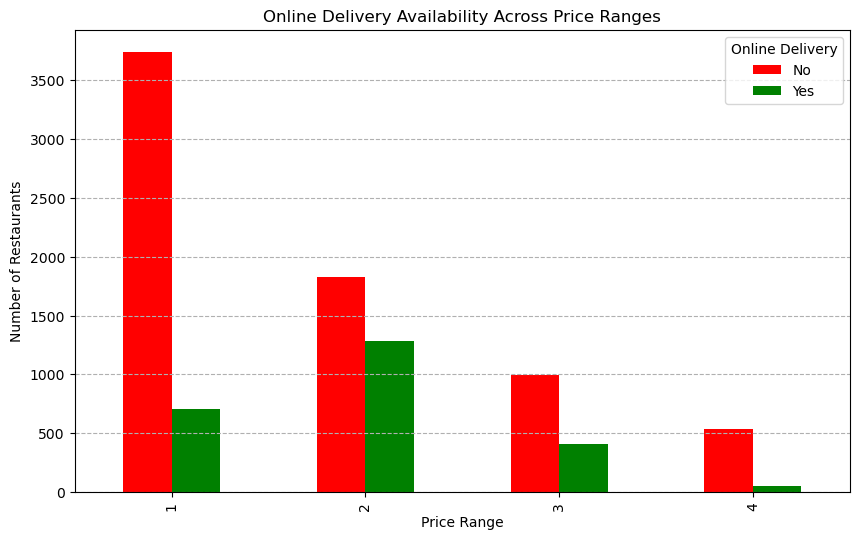

In [57]:
#Turning the delivery_avail to a pivot table for easier visualization

pivot_data = delivery_avail.pivot(index=price_range, columns=online_delivery_col, values='Count').fillna(0)
pivot_data

#visualizing the availabity of online delivery among restuarants with different price ranges.

pivot_data.plot(kind='bar', figsize=(10,6), color=['red','green'])

plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.title('Online Delivery Availability Across Price Ranges')
plt.legend(title='Online Delivery', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()